In [1]:
#Mohsin Essani
#Company_Data DT Model

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
# Importing the Dataset
df = pd.read_csv("company_dt.csv")


In [2]:
# Displaying the first 5 records of the dataset
df.head()



,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:

# Checking the dimensions of the dataset
df.shape



(400, 11)

In [6]:
# Checking the data types of each column
df.dtypes



Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [7]:
# Checking for missing values
df.isnull().sum()



Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

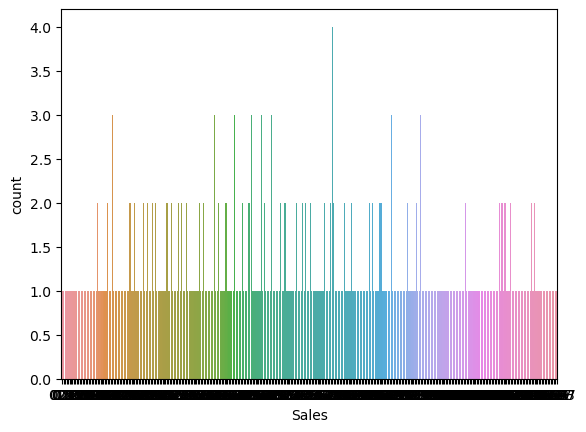

In [8]:
# Checking the distribution of the target variable
sns.countplot(x='Sales', data=df)
plt.show()



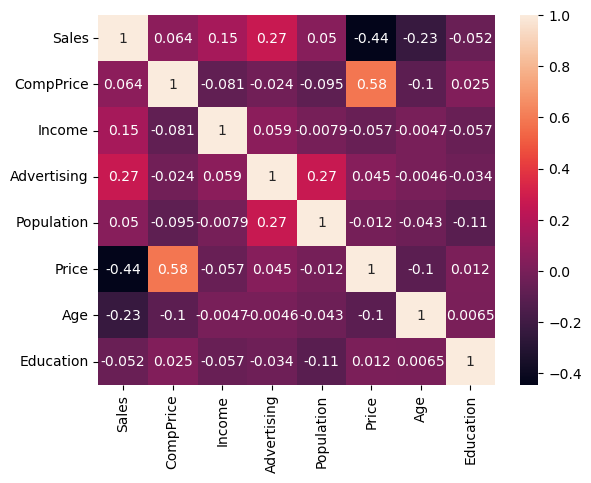

In [9]:

# Checking the correlation between the variables
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

#Below correlation has a posiitve correlation between Population and advertising and also Comp price and Price

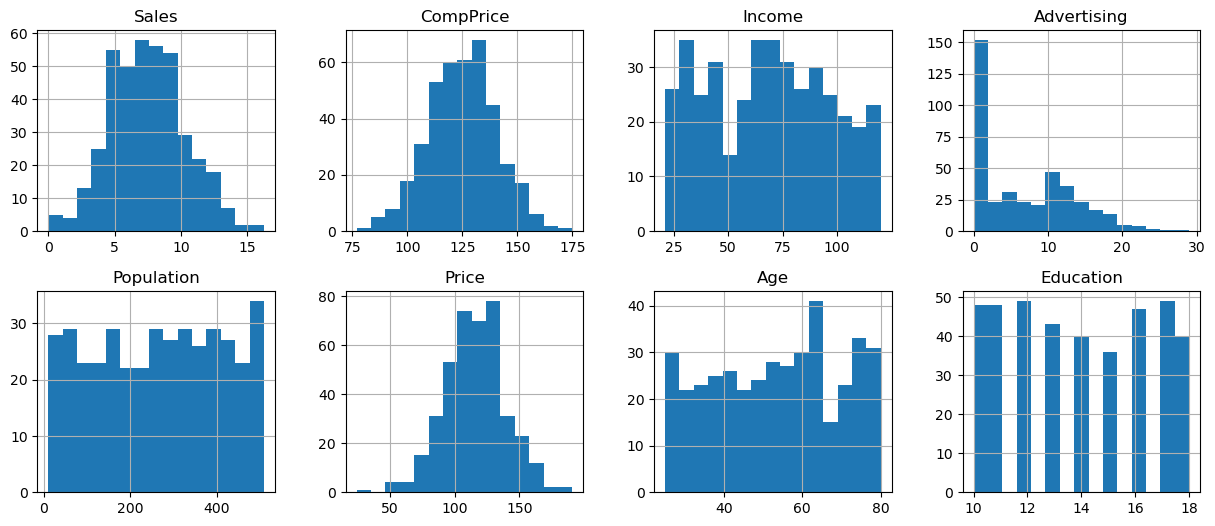

In [10]:

# Checking the distribution of each numerical variable
num_vars = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
df[num_vars].hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.show()

#Almost all are normally distributed

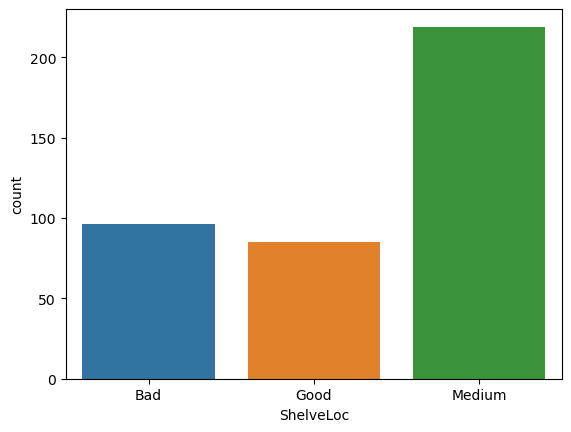

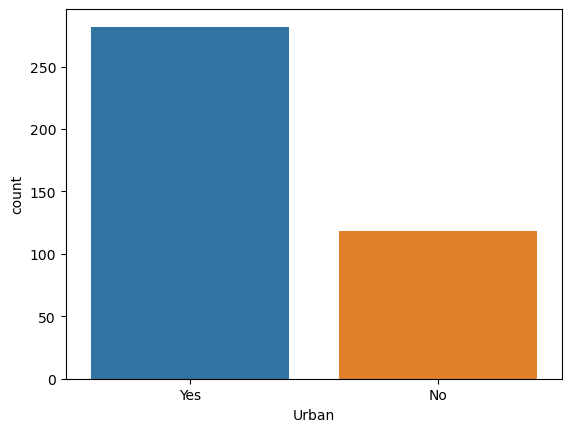

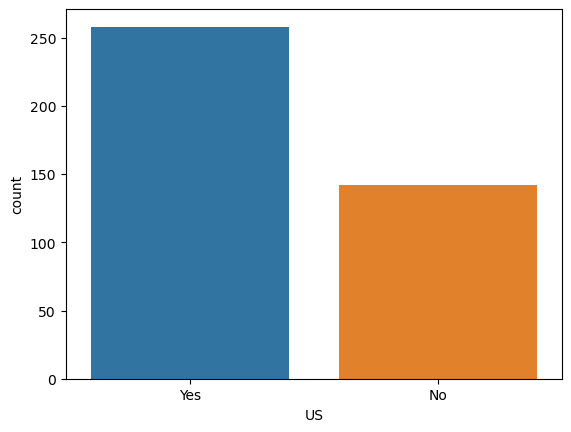

In [11]:

# Checking the distribution of each categorical variable
cat_vars = ['ShelveLoc', 'Urban', 'US']
for var in cat_vars:
    sns.countplot(x=var, data=df)
    plt.show()

#Over here Medium has higher ShelveLoc while in Urban and US, Yes has a greater weightage

In [12]:
# Converting categorical variables into dummy variables
df = pd.get_dummies(df, columns=['ShelveLoc', 'Urban', 'US'], drop_first=True)



In [13]:
# Converting the target variable into a categorical variable

df['Sales'] = pd.cut(df['Sales'], bins=[-np.inf, 10, 15, np.inf], labels=['Low', 'Medium', 'High'])


In [14]:
# Splitting the data into training and testing sets

X = df.drop('Sales', axis=1)
y = df['Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# I have used Randomized Search CV for optimised DT model accuracy

In [15]:
# Building a Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

#Using Randomized Search CV for hyperparameters and improving the accuracy.Defining the DT algorithm

dt = DecisionTreeClassifier( min_samples_split=14,max_depth=2, random_state=42)


# # Define hyperparameters to tune
# params = {'max_depth': range(1, 11), 'min_samples_split': range(2, 21)}

# # Define RandomizedSearchCV object
# rs = RandomizedSearchCV(dt, param_distributions=params, cv=5, n_iter=100, random_state=1, n_jobs=-1)

# # Fit the model using RandomizedSearchCV
# rs.fit(X_train, y_train)

# # Print the best hyperparameters
# print('Best Hyperparameters:')
# print(rs.best_params_)


dt.fit(X_train, y_train)





DecisionTreeClassifier(max_depth=2, min_samples_split=14, random_state=42)

In [16]:
# Evaluating the Performance of the Decision Tree Model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred_train = dt.predict(X_train)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
y_pred_test = dt.predict(X_test)

print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

Training Accuracy: 0.8571428571428571
Testing Accuracy: 0.8583333333333333


In [17]:
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

              precision    recall  f1-score   support

        High       0.00      0.00      0.00         1
         Low       0.88      0.96      0.92        96
      Medium       0.69      0.48      0.56        23

    accuracy                           0.86       120
   macro avg       0.52      0.48      0.49       120
weighted avg       0.84      0.86      0.84       120

[[ 0  0  1]
 [ 0 92  4]
 [ 0 12 11]]


In [18]:
# Performing Cross-Validation for improving the accuracy


from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(dt, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.875 0.9   0.8   0.8   0.85  0.85  0.9   0.825 0.825 0.875]
Mean Cross-Validation Score: 0.85


In [19]:
features = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price','Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes','US_Yes']

importance_scores = dt.feature_importances_
feature_importances = dict(zip(features, importance_scores))
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

print("Feature Importances:")
for feature, score in sorted_features:
    print(f"{feature}: {score:.3f}")

Feature Importances:
ShelveLoc_Good: 0.532
Price: 0.468
CompPrice: 0.000
Income: 0.000
Advertising: 0.000
Population: 0.000
Age: 0.000
Education: 0.000
ShelveLoc_Medium: 0.000
Urban_Yes: 0.000
US_Yes: 0.000


# The feature importances indicate that the ShelveLoc_Good attribute has the highest importance in determining the sales of the products, followed by the Price attribute. The other attributes like CompPrice, Income, Advertising, Population, Age, Education, ShelveLoc_Medium, Urban_Yes, and US_Yes have no importance in determining the sales of the products.

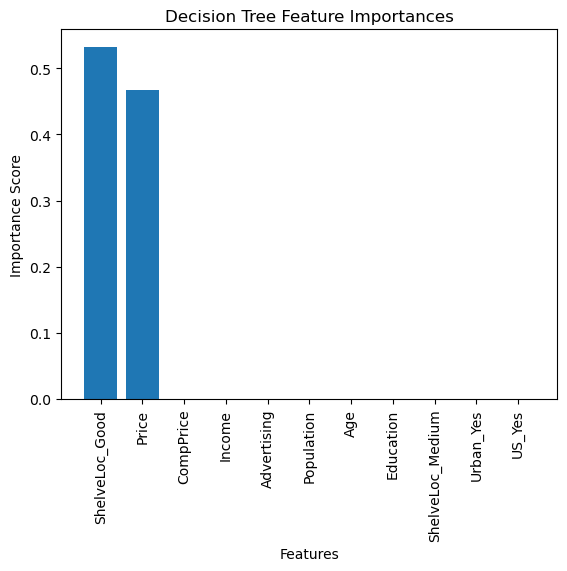

In [20]:
import matplotlib.pyplot as plt

importance_scores = dt.feature_importances_
feature_importances = dict(zip(X.columns, importance_scores))
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Create a bar plot of feature importances
plt.bar(range(len(feature_importances)), [val[1] for val in sorted_features], align='center')
plt.xticks(range(len(feature_importances)), [val[0] for val in sorted_features], rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Decision Tree Feature Importances')
plt.show()
